### 2.2 定量数据和定性数据  
为了完成对数据的判断，从区分度最高的顺序开始，即首先判断数据是定量的还是定性的？  
**定量数据**：本质上是数值，应该是衡量某样东西的数量。  
**定性数据**：本质上是类别，描述某样东西的性质。  

#### 按工作分类的工资

In [1]:
# 导包：
# 导入探索性数据分析所需的包
# 存储表格数据
import pandas as pd
# 数学计算包
import numpy as np
# 流行的数据可视化包
import matplotlib.pyplot as plt
# 另一个流行的数据可视化包
import seaborn as sns
# 允许行内渲染图形
%matplotlib inline
# 流行的数据可视化主题
plt.style.use('fivethirtyeight')

In [2]:
# 导入数据集
# 探索在旧金山做不同工作的工资
salary_ranges = pd.read_csv("../data/Salary_Ranges_by_Job_Classification.csv")

# 查看前几行
salary_ranges.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [3]:
# 查看数据有多少行，是否有缺失值，以及每列的数据类型
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
SetID                 1356 non-null object
Job Code              1356 non-null object
Eff Date              1356 non-null object
Sal End Date          1356 non-null object
Salary SetID          1356 non-null object
Sal Plan              1356 non-null object
Grade                 1356 non-null object
Step                  1356 non-null int64
Biweekly High Rate    1356 non-null object
Biweekly Low Rate     1356 non-null object
Union Code            1356 non-null int64
Extended Step         1356 non-null int64
Pay Type              1356 non-null object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [4]:
# 另一种计算缺失值数量的方法
salary_ranges.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [5]:
# describe方法查看一些定量数据的描述性统计
# 显示描述性统计
salary_ranges.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [6]:
# 很明显 Union Code 不是定量的，因此需要一些工作来理解我们感兴趣的特征。
# 最值得注意的特征是一个定量列 Biweekly High Rate（双周最高工资）和一个定性列 Grade（工作种类）
salary_ranges = salary_ranges[['Biweekly High Rate', 'Grade']]

salary_ranges.head()

,Biweekly High Rate,Grade
0,$0.00,00000
1,$15.00,00000
2,$25.00,00000
3,$50.00,00000
4,$100.00,00000


#### 双周最高工资：定量列，代表某个部门的平均最高工资
#### 工作种类：工资对应的部门

In [7]:
# 删除工资的美元符号
salary_ranges['Biweekly High Rate'].describe()

count         1356
unique         593
top       $3460.00
freq            12
Name: Biweekly High Rate, dtype: object

In [8]:
# 为了可视化，需要删除美元符号
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].map(lambda value: value.replace('$', ''))

In [9]:
# 检查是否已删除干净
salary_ranges.head()

,Biweekly High Rate,Grade
0,0.00,00000
1,15.00,00000
2,25.00,00000
3,50.00,00000
4,100.00,00000


In [10]:
# 将 Biweekly High Rate 列中的数据转换为浮点数：
salary_ranges['Biweekly High Rate'] = salary_ranges['Biweekly High Rate'].astype(float)

In [11]:
# 将工作种类转换为字符串
salary_ranges['Grade'] = salary_ranges['Grade'].astype(str)

In [12]:
# 检查转换是否生效
salary_ranges.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
Biweekly High Rate    1356 non-null float64
Grade                 1356 non-null object
dtypes: float64(1), object(1)
memory usage: 21.3+ KB


#### 由于定量数据与定性数据之间的模糊性，使用一个更深层次的方法进行处理，称为**数据4个等级**。

### 2.3 数据的4个等级

#### 数据的4个等级：
1. 定类等级（nominal level）
2. 定序等级（ordinal level）
3. 定距等级（interval level）
4. 定比等级（ratio level）

了解数据的等级十分重要，因为它决定了可以执行的可视化类型和操作。

#### 2.3.1 定类等级
结构最弱，数据按名称分类，例如血型、物种和人名，这些数据都是定性的。

In [13]:
# 不能执行任何定量数学操作，例如加法或除法。但是我们可以计数：
salary_ranges['Grade'].value_counts().head()

00000    61
07450    12
07170     9
07420     9
06870     9
Name: Grade, dtype: int64

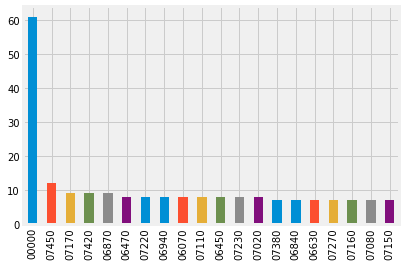

In [14]:
# 出现最多的工作种类00000是**众数**
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar')

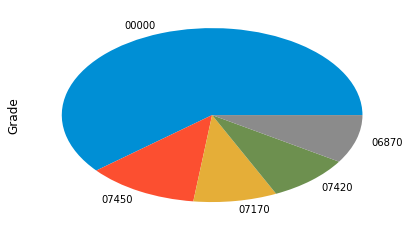

In [15]:
# 也可以绘制饼图
salary_ranges['Grade'].value_counts().sort_values(ascending=False).head(5).plot(kind='pie')

#### 2.3.2 定序等级
定序等级继承了定类等级的所有属性，而且附加有更重要的附加属性：**自然排序**  
**可以执行的数学操作：1. 计数；2. 比较； 3. 排序**。  
因为可以排序和比较，所以能计算中位数和百分位数。  
对于中位数和百分位数，可以绘制茎叶图和箱线图。  
例子包括：**1-10评分，考试成绩（A, B, C, D, F）**  

In [16]:
# 多少人喜欢旧金山国际机场数据集
customer = pd.read_csv("../data/2013_SFO_Customer_survey.csv")
customer.shape

(3535, 95)

In [17]:
# Q7A_ART 关于艺术品和展览，可能的选择是0、1、2、3、4、5、6. 0：空，1：不可接受， 2：低于平均。。。5：特别好，6：从未有人使用或参观过
art_ratings = customer['Q7A_ART']
art_ratings.describe()

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [18]:
# Pandas把该列当作数值处理，然而它虽然是数，但每个数其实代表的是类别，所以该数据是定性的，更具体的是定序的。
# 如果删除0和6两个类别，剩下的5个类似餐厅评分。
# 只考虑1-5
art_ratings = art_ratings[(art_ratings>=1) & (art_ratings<=5)]

In [19]:
# 然后将这些数值转换为字符串：
art_ratings = art_ratings.astype(str)

In [20]:
art_ratings.shape

(2656,)

In [21]:
# freq 类别出现的最高频率
art_ratings.describe()

count     2656
unique       5
top          4
freq      1066
Name: Q7A_ART, dtype: object

In [22]:
art_ratings.value_counts()

4    1066
5     803
3     696
2      71
1      20
Name: Q7A_ART, dtype: int64

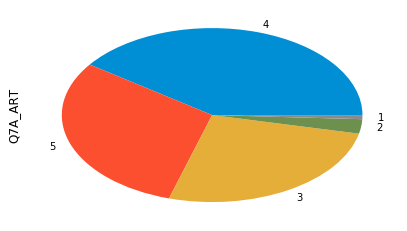

In [23]:
# 像定类等级一样用饼图
art_ratings.value_counts().plot(kind='pie')

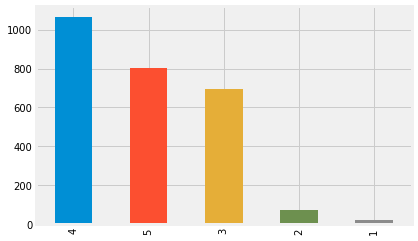

In [24]:
# 像定级等级一样用条形图
art_ratings.value_counts().plot(kind='bar')

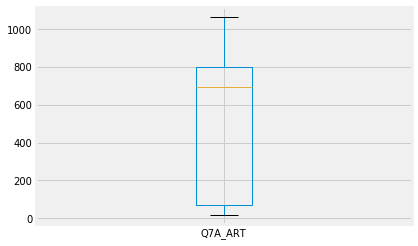

In [25]:
# 定序等级也可以画箱线图
# 箱线图表示数据的波动
art_ratings.value_counts().plot(kind='box')

#### 2.3.3 定距等级
在定距等级，数值数据不仅可以排序，值之间的差异也有意义。这意味着，在定距等级，不仅可以对值进行排序和比较，而且可以**加减**。  
**可执行的数学操作：均值、标准差**。

In [26]:
# 加载关于气候变化的数据集
climate = pd.read_csv("../data/GlobalLandTemperaturesByCity.csv")

In [27]:
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [28]:
# 移除缺失值
climate.dropna(axis=0, inplace=True)

In [29]:
# 检查是否移除干净
climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E


In [30]:
climate.isnull().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
dtype: int64

In [31]:
# 我们关注 AverageTemperature（平均温度列）。温度数据属于定距等级，不能用条形图或饼状图进行可视化，因为值太多了
climate['AverageTemperature'].nunique()

111994

In [32]:
climate['AverageTemperature'].unique()

array([ 6.068,  5.788, 10.644, ...,  9.202,  6.875,  6.66 ])

从这个级别开始，最常用的是**直方图**  
**直方图**：直方图用不同的桶包含不同的数据，对数据的频率进行可视化

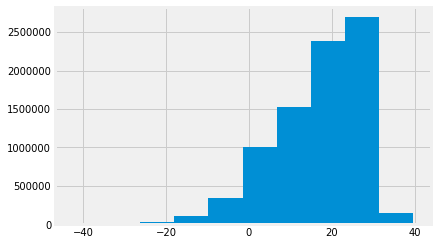

In [33]:
climate['AverageTemperature'].hist()

In [34]:
climate.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [35]:
# 将dt栏转换为日期，取年份
climate['dt'] = pd.to_datetime(climate['dt'])
climate['year'] = climate['dt'].map(lambda value: value.year)

In [36]:
# 只看美国
climate_sub_us = climate.loc[climate['Country'] == 'United States']

In [37]:
climate_sub_us.shape

(661524, 8)

In [38]:
# 加入世纪
climate_sub_us['century'] = climate_sub_us['year'].map(lambda x: int(x/100+1))

D:\Users\liulu03\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B1D9518>,
      dtype=object)

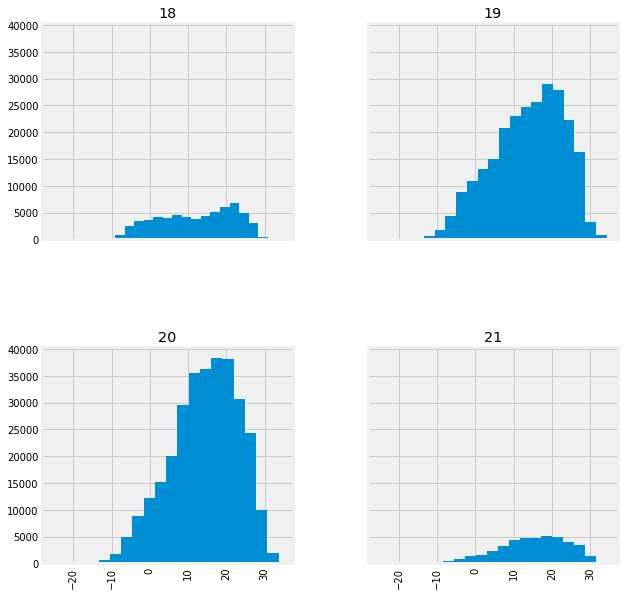

In [39]:
# 用新的century列，对每个世纪画直方图：
climate_sub_us['AverageTemperature'].hist(by=climate_sub_us['century'], sharex=True, sharey=True, figsize=(10, 10), bins=20)

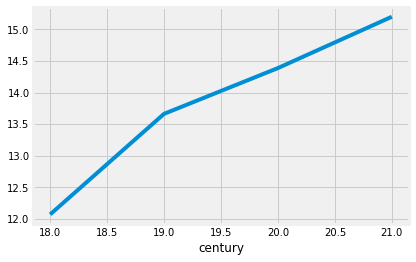

In [40]:
# 这四幅图显示平均温度随时间略微上升，确认一下：
climate_sub_us.groupby('century')['AverageTemperature'].mean().plot(kind='line')

In [41]:
centry_changes = climate_sub_us.groupby('century')['AverageTemperature'].mean()

In [42]:
centry_changes

century
18    12.073243
19    13.662870
20    14.386622
21    15.197692
Name: AverageTemperature, dtype: float64

In [43]:
# 21世纪的平均温度减去18世纪的平均温度
centry_changes[21] - centry_changes[18]

3.124449115460754

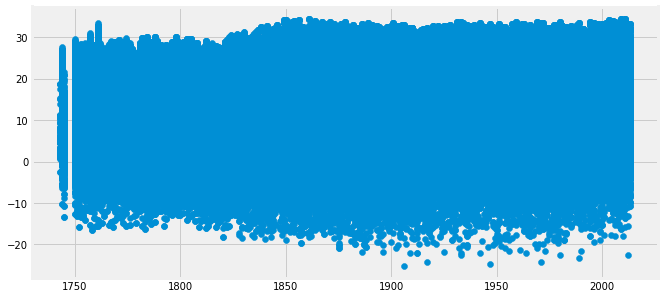

In [44]:
x = climate_sub_us['year']
y = climate_sub_us['AverageTemperature']

fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(x, y)
plt.show()

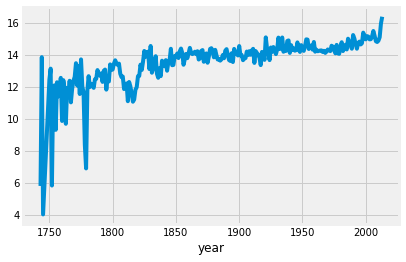

In [45]:
# 用groupby清除美国气温的噪声
climate_sub_us.groupby('year').mean()['AverageTemperature'].plot()

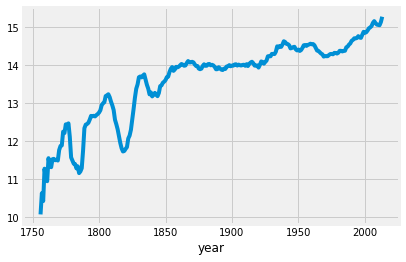

In [46]:
# 用滑动平均平均图像 rolling N个窗口取平均
climate_sub_us.groupby('year').mean()['AverageTemperature'].rolling(10).mean().plot()

#### 2.3.4 定比等级
定比等级继承了定距等级的加减运算，而且多了一个**绝对零点**概念，可以做乘除操作  
**可以执行的数学操作：所有之前等级的 + 乘除操作**  
例子：
1. \$100是\$50的两倍
2. 10mg青霉素是20mg青霉素的一半
3. 温度不能乘除，没有意义

Text(0.5,1,'Top 20 Grade by Mean Biweekly High Rate')

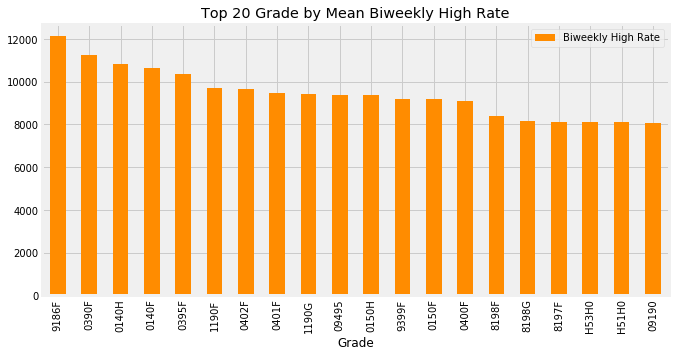

In [47]:
# 回到旧金山工资数据
# 哪个工作种类的工资最高
fig, ax = plt.subplots(figsize=(10, 5))

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values('Biweekly High Rate', ascending=False).head(20).plot.bar(stacked=False, ax=ax, color='darkorange')

ax.set_title('Top 20 Grade by Mean Biweekly High Rate')

Text(0.5,1,'Tail 20 Grade by Mean Biweekly High Rate')

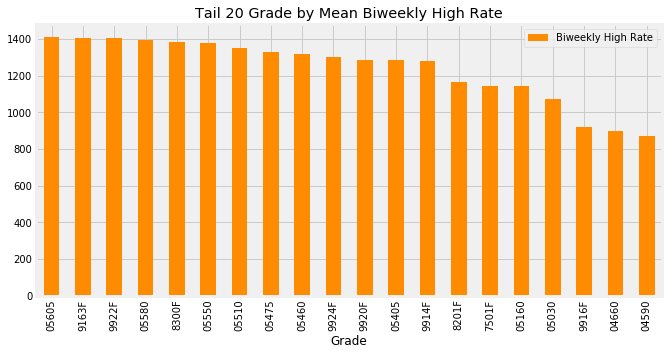

In [48]:
# 哪个工作种类的工资最低
fig, ax = plt.subplots(figsize=(10, 5))

salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values('Biweekly High Rate', ascending=False).tail(20).plot.bar(stacked=False, ax=ax, color='darkorange')

ax.set_title('Tail 20 Grade by Mean Biweekly High Rate')

In [49]:
# 工资最高的员工与工资最低的员工工资比值：
sorted_df = salary_ranges.groupby('Grade')[['Biweekly High Rate']].mean().sort_values('Biweekly High Rate', ascending=False)

sorted_df.iloc[0][0] / sorted_df.iloc[-1][0]

13.931919540229886